In [ ]:
from datetime import datetime 
import numpy as np 
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
stockSymbol = ['FB','AMZN','AAPL','NFLX',"GOOG"]

In [ ]:
stockStartDate = '2013-01-01'

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2020-08-09


In [ ]:
numAssets = len(stockSymbol)

print('You have '+str(numAssets)+' assets in your portfolio')

You have 5 assets in your portfolio


In [ ]:
def getMyPortfolio(stocks = stockSymbol, start =stockStartDate, end = today, col = 'Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo',start = start, end=end)[col]
  return data

In [ ]:
my_stocks = getMyPortfolio(stockSymbol)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823
...,...,...,...,...,...
2020-08-03,251.960007,3111.889893,434.965759,498.619995,1474.449951
2020-08-04,249.830002,3138.830078,437.870514,509.640015,1464.969971
2020-08-05,249.119995,3205.030029,439.457642,502.109985,1473.609985


In [ ]:
def showGraph(stocks = stockSymbol, start =stockStartDate, end = today, col = 'Adj Close'):
  title = 'Portfolio'+col+'Price History'
  my_stocks = getMyPortfolio(stocks=stocks,start=start,end=end,col=col) 

  plt.figure(figsize=(12.2,4.5) )
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)


  plt.title(title)
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel(col +'Adj close Price USD$', fontsize =18)
  plt.legend(my_stocks.columns.values,loc='upper left')
  plt.show()


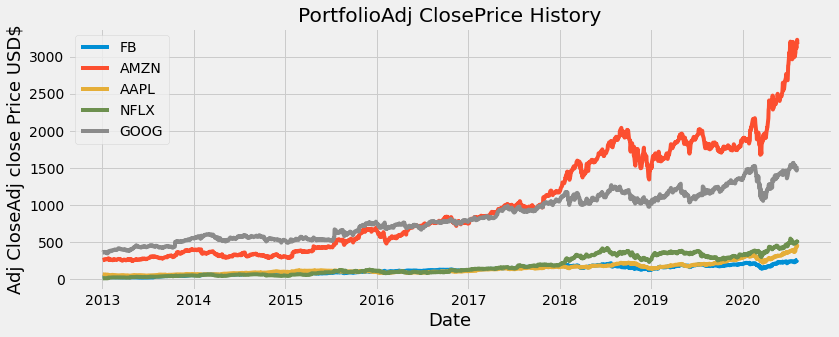

In [ ]:
showGraph(stockSymbol)

In [ ]:
daily_simple_return = my_stocks.pct_change(1)
daily_simple_return

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-08-03,-0.006741,-0.016681,0.025198,0.019923,-0.005739
2020-08-04,-0.008454,0.008657,0.006678,0.022101,-0.006430
2020-08-05,-0.002842,0.021091,0.003625,-0.014775,0.005898


In [ ]:
daily_simple_return.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.505316,0.443657,0.346106,0.558728
AMZN,0.505316,1.000000,0.430758,0.439859,0.602075
AAPL,0.443657,0.430758,1.000000,0.252196,0.523226
NFLX,0.346106,0.439859,0.252196,1.000000,0.417057
GOOG,0.558728,0.602075,0.523226,0.417057,1.000000


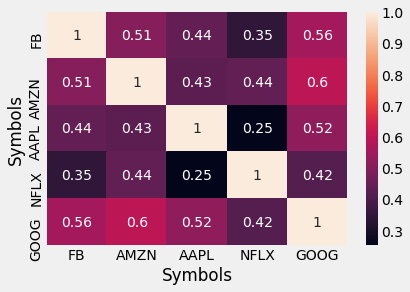

In [ ]:
import seaborn as sns
sns.heatmap(daily_simple_return.corr(), annot =True)

In [ ]:
daily_simple_return.cov()

#check for votality and covariance.

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000466,0.000209,0.000168,0.000217,0.000194
AMZN,0.000209,0.000368,0.000145,0.000245,0.000186
AAPL,0.000168,0.000145,0.000310,0.000129,0.000148
NFLX,0.000217,0.000245,0.000129,0.000842,0.000194
GOOG,0.000194,0.000186,0.000148,0.000194,0.000258


In [ ]:
daily_simple_return.var()

Symbols
FB      0.000466
AMZN    0.000368
AAPL    0.000310
NFLX    0.000842
GOOG    0.000258
dtype: float64

In [ ]:
#Using standard deviation for daily simple returns

print("Stock volatility")
daily_simple_return.std()

Stock volatility


Symbols
FB      0.021579
AMZN    0.019184
AAPL    0.017594
NFLX    0.029010
GOOG    0.016062
dtype: float64

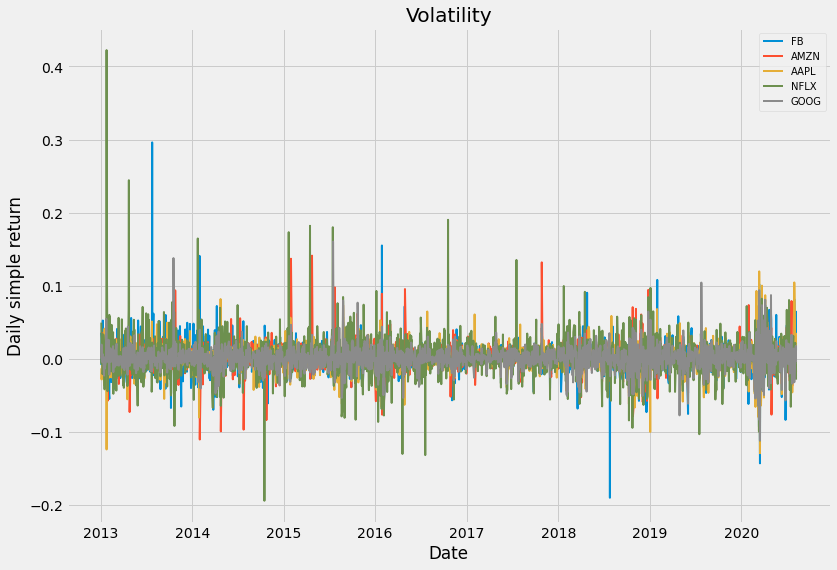

In [ ]:
plt.figure(figsize=(12.2,8.5))

for c in daily_simple_return.columns.values:
  plt.plot(daily_simple_return[c],lw=2,label=c)

plt.legend(loc='upper right', fontsize =10)
plt.title('Volatility')
plt.ylabel('Daily simple return')
plt.xlabel('Date')
plt.show()



In [ ]:
dailyMeansimplereturn=daily_simple_return.mean()
dailyMeansimplereturn

Symbols
FB      0.001412
AMZN    0.001496
AAPL    0.001134
NFLX    0.002304
GOOG    0.000872
dtype: float64

In [ ]:
randomweights = np.array([0.4,0.1,0.3,0.1,0.1])

portfolioSimpleReturn = np.sum(dailyMeansimplereturn*randomweights)

In [ ]:
#expected annula return:

print('Expected annualized portfolio wimple return: '+str(portfolioSimpleReturn *253))

Expected annualized portfolio wimple return: 0.3471768472520089


In [ ]:
#Growth of the Investment
dailyCumulSimpleReturn=(daily_simple_return+1).cumprod()
dailyCumulSimpleReturn







Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-08-03,8.998572,12.093933,6.361119,37.934353,4.092573
2020-08-04,8.922500,12.198632,6.403600,38.772742,4.066259
2020-08-05,8.897143,12.455909,6.426811,38.199867,4.090241


Text(0.5, 1.0, 'Daily Cumulative Simple returns')

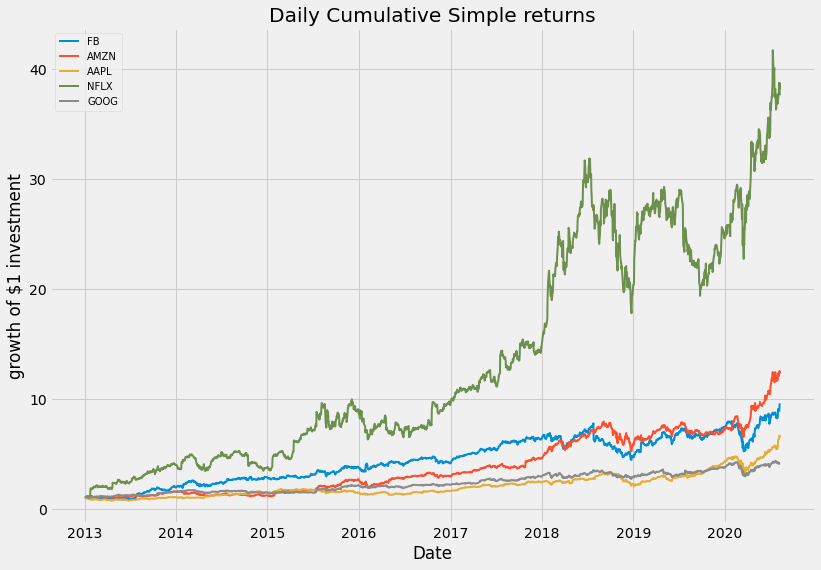

In [ ]:
plt.figure(figsize=(12.2,8.5))
for c in dailyCumulSimpleReturn.columns.values:
  plt.plot(dailyCumulSimpleReturn.index,dailyCumulSimpleReturn[c], lw=2,label =c)

plt.legend(loc='upper left', fontsize =10)
plt.xlabel('Date')
plt.ylabel('growth of $1 investment')
plt.title('Daily Cumulative Simple returns')